# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du [Cours TAL](https://cyberlearn.hes-so.ch/course/view.php?id=14966) est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3.7 ou 3.8](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais (1b et 1c), puis en français (1d).

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Pour utiliser NLTK en Python (y compris dans un _notebook_ Jupyter), vous pouvez écrire `import nltk`, puis accéder à toutes les commandes avec le préfixe `nltk.`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements qui peut être invoqué depuis un interpréteur Python en ligne de commande (écrire `python3` en ligne de commande) avec les deux commandes `import nltk` puis `nltk.download()`.  Cela vous permettra de télécharger de nombreux corpus _additionnels_ (i.e. collections de textes), mais que nous n'utiliserons pas en laboratoire.

In [59]:
import nltk
from nltk.book import *
nltk.download('gutenberg')

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.


LookupError: 
**********************************************************************
  Resource [93mgutenberg[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('gutenberg')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/gutenberg[0m

  Searched in:
    - 'C:\\Users\\babac/nltk_data'
    - 'C:\\Users\\babac\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\babac\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\babac\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\babac\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Écrivez une phrase en anglais (liste de mots / string) que vous appelerez `sentence1`.  

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, trier les bi-grammes par ordre alphabétique et afficher le résultat.

In [60]:
sentence1 = ['My', 'name', 'is', 'Bastian', 'and', 'I', 'love', 'programming', 'in', 'python']
len(sentence1)

10

In [61]:
bigrams_sentence1 = nltk.bigrams(sentence1)
sorted_bigrams = list(bigrams_sentence1)
sorted_bigrams.sort()
print(sorted_bigrams)

[('Bastian', 'and'), ('I', 'love'), ('My', 'name'), ('and', 'I'), ('in', 'python'), ('is', 'Bastian'), ('love', 'programming'), ('name', 'is'), ('programming', 'in')]


Défnissez une chaîne appelée `string2` contenant une phrase.  Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [62]:
nltk.download('punkt')
string2 = 'Bonjour à tous mes petits amis'
sentence2 = list(nltk.word_tokenize(string2))
print(sentence2)

['Bonjour', 'à', 'tous', 'mes', 'petits', 'amis']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\babac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stocker le contenu dans une chaîne.

In [63]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder le texte principal.  Vous pouvez utiliser la notation dite de *slicing* en Python, ou identifier les chaînes où commence et finit le véritable texte.  Quelle est la longueur de ce texte en caractères ?  (Lien utile : [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).)

In [64]:
begin_txt = '*** START OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***'
end_txt = '*** END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***'

begin_index = raw.find(begin_txt)
end_index = raw.rfind(end_txt)

main_text = raw[begin_index+len(begin_txt):end_index-len(end_txt)]
print(len(main_text))

1157107


Vous allez maintenant segmenter le texte en phrases et les écrire dans un fichier avec une phrase par ligne.  Vous allez également segmenter chaque phrase en _tokens_ (mots et ponctuations), et créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  Vous aurez besoin des fonctions suivantes de nltk:
* `nltk.sent_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (notez que le nom "sentence tokenize" n'est pas très logique)
* `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segmentez le texte en phrases avec NLTK.** Affichez le nombre de phrases obtenues, et un court extrait de 5-6 phrases.  Comment appréciez-vous la qualité de la segmentation ?  *Note :* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`.

In [65]:
main_text = main_text.replace('\r\n', ' ')
main_text = main_text.replace('_', '')
sent_tokenized = nltk.sent_tokenize(main_text)

# La segmentation est relativement bonne moyennant un remplacement de qques caractères spéciaux pour la relecture.    

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [66]:
import os

In [67]:
filename1 = "sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
with open(filename1, 'a', encoding='utf8') as fd:
    for sentence in sent_tokenized:
        fd.write(sentence + '\n')
    fd.close()


**Segmentez maintenant chaque phrase en tokens (mots et ponctuations).**  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez quelques phrases et commentez la qualité de la tokenisation.

In [68]:
word_tokenized = [nltk.word_tokenize(sentence) for sentence in sent_tokenized]
print(word_tokenized[:5])

# La tokenisation est bonne, mais certain choix sont discutables comme le " 'S " possessif de l'anglais qui est découpé en "mot" "'" et "s". 

[['CRIME', 'AND', 'PUNISHMENT', 'By', 'Fyodor', 'Dostoevsky', 'Translated', 'By', 'Constance', 'Garnett', 'TRANSLATOR', '’', 'S', 'PREFACE', 'A', 'few', 'words', 'about', 'Dostoevsky', 'himself', 'may', 'help', 'the', 'English', 'reader', 'to', 'understand', 'his', 'work', '.'], ['Dostoevsky', 'was', 'the', 'son', 'of', 'a', 'doctor', '.'], ['His', 'parents', 'were', 'very', 'hard-working', 'and', 'deeply', 'religious', 'people', ',', 'but', 'so', 'poor', 'that', 'they', 'lived', 'with', 'their', 'five', 'children', 'in', 'only', 'two', 'rooms', '.'], ['The', 'father', 'and', 'mother', 'spent', 'their', 'evenings', 'in', 'reading', 'aloud', 'to', 'their', 'children', ',', 'generally', 'from', 'books', 'of', 'a', 'serious', 'character', '.'], ['Though', 'always', 'sickly', 'and', 'delicate', 'Dostoevsky', 'came', 'out', 'third', 'in', 'the', 'final', 'examination', 'of', 'the', 'Petersburg', 'school', 'of', 'Engineering', '.']]


Calculez le nombre total de _tokens_ obtenus.

In [69]:
total_tokens = sum([len(sentence) for sentence in word_tokenized])
total_tokens

253632

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne et en insérant un espace entre chaque _token_.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [70]:
filename2 = "sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')
for sentence in word_tokenized:
    fd.write(' '.join(sentence) + '\n')
fd.close()

Il est également possible de *tokeniser un texte sans le segmenter préalablement en phrases*.
* Effectuez cette opération directement sur la chaîne de caractères contenant tout le texte.  
* Affichez et observez un court extrait. 
* Demandez le nombre total de tokens et comparez-le avec le nombre précédent.  
* Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [71]:
tokens = nltk.word_tokenize(main_text)
print(tokens[:10])
len(tokens)
# Le résultat est identique

['CRIME', 'AND', 'PUNISHMENT', 'By', 'Fyodor', 'Dostoevsky', 'Translated', 'By', 'Constance', 'Garnett']


253632

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  Ces objets peuvent être créés avec : 
1. la chaîne de caractères constituant le texte
2. la liste de tous les mots du texte (chaînes)
3. la liste de toutes les phrases (liste de listes)

**Attention:**

* seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`
* les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`

Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  (Vous pouvez appeler ici `nltk.word_tokenize`.)

In [72]:
text = nltk.Text(tokens)

Le [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) montre des exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.  Par exemple, on peut afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`, ou trouver des mots qui ont des contextes semblables à un mot donné avec `similar`.  Veuillez expérimenter ci-dessous avec ces deux méthodes et afficher un résultat à chaque fois.

In [73]:
text.concordance('love')

Displaying 25 of 75 matches:
with extraordinary demonstrations of love and honour . A few months later Dost
 husband , an infantry officer , for love , and ran away with him from her fat
t of spirits , and yet this poignant love for his wife and children bewildered
 inevitable silence . You know how I love you ; you are all we have to look to
well . Of course , there is no great love either on his side , or on hers , bu
g herself ; she bids me send you her love and innumerable kisses . But althoug
a mother ’ s blessing till we meet . Love Dounia your sister , Rodya ; love he
 . Love Dounia your sister , Rodya ; love her as she loves you and understand 
t . And why does she write to me , ‘ love Dounia , Rodya , and she loves you m
zhin . ‘ There can be no question of love , ’ mother writes . And what if ther
 up all claim to activity , life and love ! ” “ Do you understand , sir , do y
 , I liked her , though I was not in love with her ... a youthful affair in fa
 written undertaking bu

In [74]:
text.similar('love')

see you know give it let take himself him them mind all will told the
understand that put thought left


En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations les plus fréquentes dans votre texte.

In [75]:
nltk.download('stopwords')
text.collocation_list()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\babac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('Katerina', 'Ivanovna'),
 ('Pyotr', 'Petrovitch'),
 ('Pulcheria', 'Alexandrovna'),
 ('Avdotya', 'Romanovna'),
 ('Rodion', 'Romanovitch'),
 ('Marfa', 'Petrovna'),
 ('Sofya', 'Semyonovna'),
 ('old', 'woman'),
 ('Porfiry', 'Petrovitch'),
 ('Amalia', 'Ivanovna'),
 ('great', 'deal'),
 ('young', 'man'),
 ('Nikodim', 'Fomitch'),
 ('Ilya', 'Petrovitch'),
 ('Andrey', 'Semyonovitch'),
 ('Hay', 'Market'),
 ('Dmitri', 'Prokofitch'),
 ('Good', 'heavens'),
 ('police', 'station'),
 ('head', 'clerk')]

On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste des _types_) simplement en convertissant la liste des mots (occurrences ou _tokens_) à un `set` en Python.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [76]:
vocab = set(tokens)
len(vocab)

10905

In [77]:
vocab_gt_15 = [word for word in vocab if len(word) > 15]
print(vocab_gt_15)

['evil-intentioned', 'cross-examination', 'conscience-prick', 'disproportionate', 'poverty-stricken', 'half-broken-down', 'circumstantially', 'grey-and-rainbow-coloured', 'sinister-looking', 'disproportionately', 'Cough-cough-cough', 'straight-forward', 'indistinguishable', 'Schleswig-Holstein', 'horrible-looking', 'pawnbroker-woman', 'superciliousness', 'waistcoat-pocket', 'governor-general', 'self-confidently', 'misunderstanding', 'Governor-General', 'delicate-looking', 'terrible-looking', 'enthusiastically', 'indiscriminately', 'well-proportioned', 'frightened-looking']


**Distributions de fréquence (Frequency Distributions)**

NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text`.  Le résultat est stocké dans un objet de type `FreqDist` (pour _frequency distribution_) comme montré dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de là, on peut déterminer les mots les plus fréquents.

Veuillez construire la distribution de fréquences de votre texte.

In [78]:
fdist = nltk.FreqDist(text)

Affichez les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

In [79]:
most_common = fdist.most_common(70)
most_common_gt_4 = [word for word, freq in most_common if len(word) > 4]
print(most_common_gt_4)

['Raskolnikov', 'there', 'would', 'about']


## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

Nous allons utiliser les fonctions graphiques de NLTK, mais il est possible de générer directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

Affichez le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

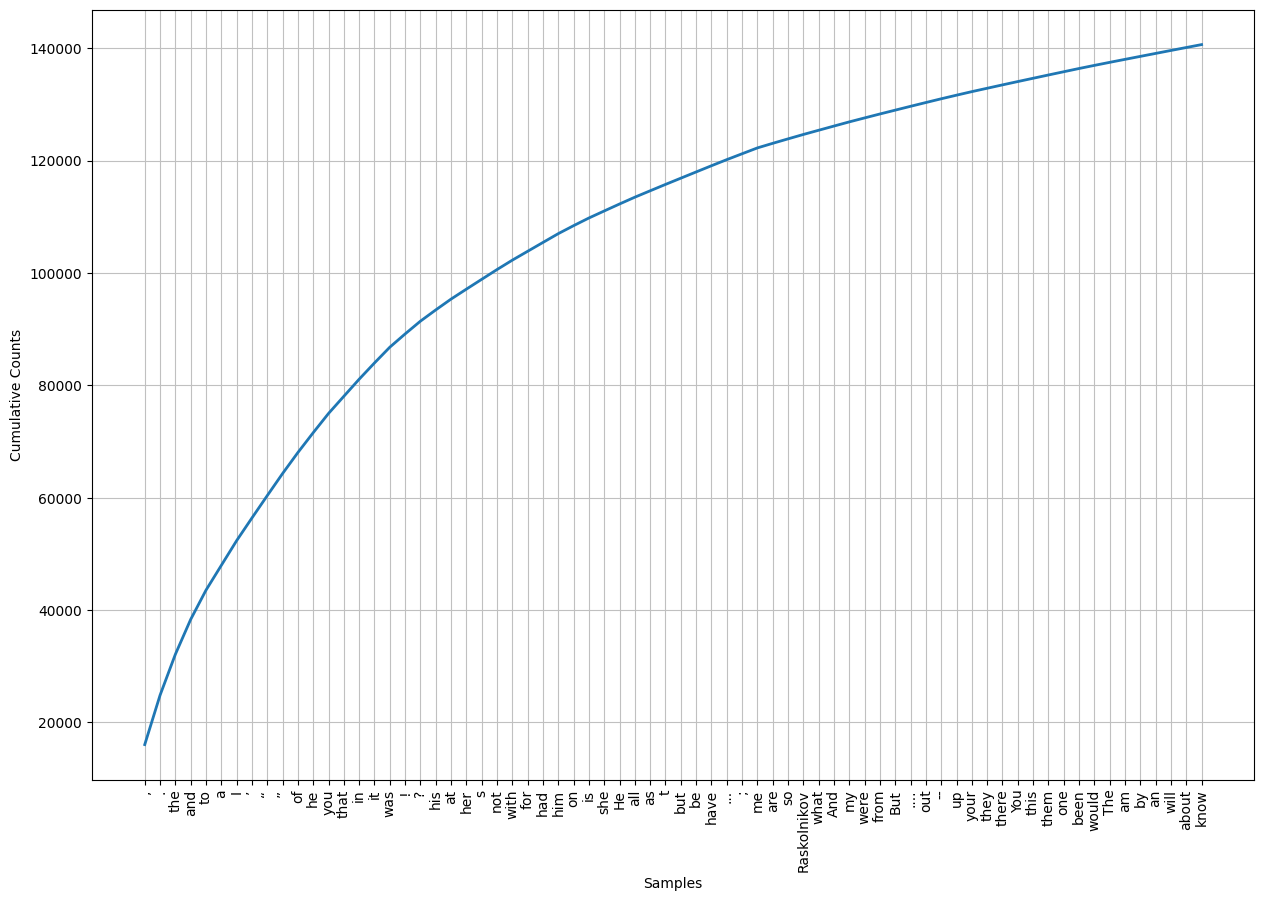

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [81]:
plt.figure(figsize=(15, 10))
fdist.plot(70, cumulative=True)

Maintenant, construisez une liste avec la longueur de chaque _token_ du texte (la liste aura donc autant de nombres que de tokens).  Créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (cette fois-ci _non_-cumulative) des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

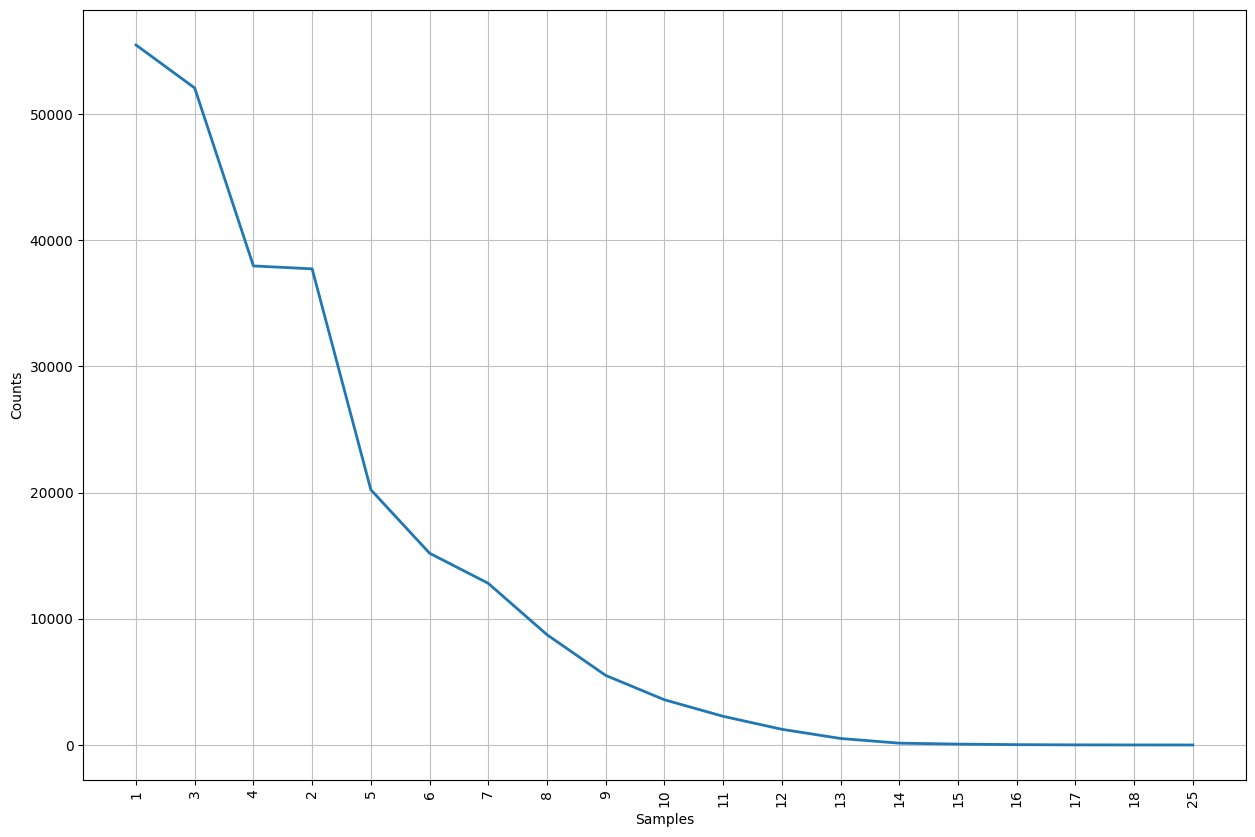

<Axes: xlabel='Samples', ylabel='Counts'>

In [82]:
len_tokens = [len(token) for token in tokens]
fdist_len = nltk.FreqDist(len_tokens)
plt.figure(figsize=(15, 10))
fdist_len.plot()

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1c et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 